# **영상 해상도 복원을 위한 CNN 모델**

from https://deep-mind-learning.tistory.com/36

## **1. 데이터 준비**

- 공개 데이터셋 다운로드

In [1]:
!wget http://vis-www.cs.umass.edu/lfw/lfw-deepfunneled.tgz

--2023-08-18 00:05:04--  http://vis-www.cs.umass.edu/lfw/lfw-deepfunneled.tgz
vis-www.cs.umass.edu (vis-www.cs.umass.edu) 해석 중... 128.119.244.95
다음으로 연결 중: vis-www.cs.umass.edu (vis-www.cs.umass.edu)|128.119.244.95|:80... 연결했습니다.
HTTP 요청을 보냈습니다. 응답 기다리는 중... 200 OK
길이: 108761145 (104M) [application/x-gzip]
저장 위치: ‘lfw-deepfunneled.tgz.1’

lfw-deepfunneled.tg  13%[=>                  ]  14.34M   340KB/s    약 3m 54s   ^C


- 압축 풀기

In [2]:
!tar -zxvf lfw-deepfunneled.tgz

lfw-deepfunneled/AJ_Cook/AJ_Cook_0001.jpg
lfw-deepfunneled/AJ_Lamas/AJ_Lamas_0001.jpg
lfw-deepfunneled/Aaron_Eckhart/Aaron_Eckhart_0001.jpg
lfw-deepfunneled/Aaron_Guiel/Aaron_Guiel_0001.jpg
lfw-deepfunneled/Aaron_Patterson/Aaron_Patterson_0001.jpg
lfw-deepfunneled/Aaron_Peirsol/Aaron_Peirsol_0001.jpg
lfw-deepfunneled/Aaron_Peirsol/Aaron_Peirsol_0002.jpg
lfw-deepfunneled/Aaron_Peirsol/Aaron_Peirsol_0003.jpg
lfw-deepfunneled/Aaron_Peirsol/Aaron_Peirsol_0004.jpg
lfw-deepfunneled/Aaron_Pena/Aaron_Pena_0001.jpg
lfw-deepfunneled/Aaron_Sorkin/Aaron_Sorkin_0001.jpg
lfw-deepfunneled/Aaron_Sorkin/Aaron_Sorkin_0002.jpg
lfw-deepfunneled/Aaron_Tippin/Aaron_Tippin_0001.jpg
lfw-deepfunneled/Abba_Eban/Abba_Eban_0001.jpg
lfw-deepfunneled/Abbas_Kiarostami/Abbas_Kiarostami_0001.jpg
lfw-deepfunneled/Abdel_Aziz_Al-Hakim/Abdel_Aziz_Al-Hakim_0001.jpg
lfw-deepfunneled/Abdel_Madi_Shabneh/Abdel_Madi_Shabneh_0001.jpg
lfw-deepfunneled/Abdel_Nasser_Assidi/Abdel_Nasser_Assidi_0001.jpg
lfw-deepfunneled/Abdel_Nasser_

- train 폴더 생성 및 파일 이동

In [3]:
!mkdir lfw-deepfunneled/train

mkdir: `lfw-deepfunneled/train' 디렉터리를 만들 수 없습니다: 파일이 있습니다


In [4]:
!mv lfw-deepfunneled/[A-U]* lfw-deepfunneled/train

mv: 'lfw-deepfunneled/AJ_Cook'를 'lfw-deepfunneled/train/AJ_Cook'로 옮길 수 없음: 디렉터리가 비어있지 않음
mv: 'lfw-deepfunneled/AJ_Lamas'를 'lfw-deepfunneled/train/AJ_Lamas'로 옮길 수 없음: 디렉터리가 비어있지 않음
mv: 'lfw-deepfunneled/Aaron_Eckhart'를 'lfw-deepfunneled/train/Aaron_Eckhart'로 옮길 수 없음: 디렉터리가 비어있지 않음
mv: 'lfw-deepfunneled/Aaron_Guiel'를 'lfw-deepfunneled/train/Aaron_Guiel'로 옮길 수 없음: 디렉터리가 비어있지 않음
mv: 'lfw-deepfunneled/Aaron_Patterson'를 'lfw-deepfunneled/train/Aaron_Patterson'로 옮길 수 없음: 디렉터리가 비어있지 않음
mv: 'lfw-deepfunneled/Aaron_Peirsol'를 'lfw-deepfunneled/train/Aaron_Peirsol'로 옮길 수 없음: 디렉터리가 비어있지 않음
mv: 'lfw-deepfunneled/Aaron_Pena'를 'lfw-deepfunneled/train/Aaron_Pena'로 옮길 수 없음: 디렉터리가 비어있지 않음
mv: 'lfw-deepfunneled/Aaron_Sorkin'를 'lfw-deepfunneled/train/Aaron_Sorkin'로 옮길 수 없음: 디렉터리가 비어있지 않음
mv: 'lfw-deepfunneled/Aaron_Tippin'를 'lfw-deepfunneled/train/Aaron_Tippin'로 옮길 수 없음: 디렉터리가 비어있지 않음
mv: 'lfw-deepfunneled/Abba_Eban'를 'lfw-deepfunneled/train/Abba_Eban'로 옮길 수 없음: 디렉터리가 비어있지 않음
mv: 'lfw-deepfunneled/Abbas_Ki

- test 폴더 생성 및 파일 이동

In [5]:
!mkdir lfw-deepfunneled/test

mkdir: `lfw-deepfunneled/test' 디렉터리를 만들 수 없습니다: 파일이 있습니다


In [6]:
!mv lfw-deepfunneled/[V-Z]* lfw-deepfunneled/test

mv: 'lfw-deepfunneled/Vaclav_Havel'를 'lfw-deepfunneled/test/Vaclav_Havel'로 옮길 수 없음: 디렉터리가 비어있지 않음
mv: 'lfw-deepfunneled/Vaclav_Klaus'를 'lfw-deepfunneled/test/Vaclav_Klaus'로 옮길 수 없음: 디렉터리가 비어있지 않음
mv: 'lfw-deepfunneled/Vadim_Devyatovskiy'를 'lfw-deepfunneled/test/Vadim_Devyatovskiy'로 옮길 수 없음: 디렉터리가 비어있지 않음
mv: 'lfw-deepfunneled/Vadim_Strogalev'를 'lfw-deepfunneled/test/Vadim_Strogalev'로 옮길 수 없음: 디렉터리가 비어있지 않음
mv: 'lfw-deepfunneled/Vagit_Alekperov'를 'lfw-deepfunneled/test/Vagit_Alekperov'로 옮길 수 없음: 디렉터리가 비어있지 않음
mv: 'lfw-deepfunneled/Val_Ackerman'를 'lfw-deepfunneled/test/Val_Ackerman'로 옮길 수 없음: 디렉터리가 비어있지 않음
mv: 'lfw-deepfunneled/Valdas_Adamkus'를 'lfw-deepfunneled/test/Valdas_Adamkus'로 옮길 수 없음: 디렉터리가 비어있지 않음
mv: 'lfw-deepfunneled/Valentina_Cervi'를 'lfw-deepfunneled/test/Valentina_Cervi'로 옮길 수 없음: 디렉터리가 비어있지 않음
mv: 'lfw-deepfunneled/Valentina_Tereshkova'를 'lfw-deepfunneled/test/Valentina_Tereshkova'로 옮길 수 없음: 디렉터리가 비어있지 않음
mv: 'lfw-deepfunneled/Valentino_Rossi'를 'lfw-deepfunneled/test/Valen

## **2. 필요한 라이브러리 가져오기**

In [7]:
!pip install tqdm

In [11]:
import torch
from torch import nn, optim
from torch.utils.data import (Dataset, DataLoader, TensorDataset)
from torchvision.datasets import ImageFolder
from torchvision import transforms

from tqdm import tqdm

- 제각각의 크기를 가진 영상들을 128x128과 32x32의 두 가지 경우로 구분하여 입력값과 기대값(Ground Truth)을 만듦

In [2]:
class DownSizedPairImageFolder(ImageFolder):
    def __init__(self, root, transform=None, large_size=128, small_size=32, **kwds):
        super().__init__(root, transform=transform, **kwds)
        self.large_resizer = transforms.Resize(large_size)
        self.small_resizer = transforms.Resize(small_size)

    def __getitem__(self, index):
        path, _ = self.imgs[index]
        img = self.loader(path)

        large_img = self.large_resizer(img)
        small_img = self.small_resizer(img)

        if self.transform is not None:
            large_img = self.transform(large_img)
            small_img = self.transform(small_img)
            
        return small_img, large_img

## **3. Up-Sampling하기 위한 모델 구현**

In [3]:
train_data = DownSizedPairImageFolder('./lfw-deepfunneled/train', transform=transforms.ToTensor())
valid_data = DownSizedPairImageFolder('./lfw-deepfunneled/test', transform=transforms.ToTensor())

In [4]:
batch_size = 64

In [5]:
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True, num_workers=4)
valid_loader = DataLoader(valid_data, batch_size=batch_size, shuffle=False, num_workers=4)

- Up-Sampling 모델
    - Conv2d : stride=2의 값을 주어 영상의 크기를 절반으로 줄이는 역할 수행
    - ConvTranspose2d : stride=2의 값을 주어 영상의 크기를 2배로 키우는 역할 수행
    - 입력 영상의 크기에 따라 계산 과정에서 몇 픽셀 정도의 차이가 발생할 수 있으므로 Padding을 통해 보정
    - 네트워크의 흐름: 1/2 축소 -> 1/2 축소 -> 2배 확대 -> 2배 확대 -> 2배 확대 -> 2배 확대
    - 입력 영상의 크기를 4배로 확대한 영상을 출력 값으로 생성함

In [6]:
network = nn.Sequential(
    nn.Conv2d(3, 256, 4, stride=2, padding=1),
    nn.ReLU(),
    nn.BatchNorm2d(256),
    nn.Conv2d(256, 512, 4, stride=2, padding=1),
    nn.ReLU(),
    nn.BatchNorm2d(512),
    nn.ConvTranspose2d(512, 256, 4, stride=2, padding=1),
    nn.ReLU(),
    nn.BatchNorm2d(256),
    nn.ConvTranspose2d(256, 128, 4, stride=2, padding=1),
    nn.ReLU(),
    nn.BatchNorm2d(128),
    nn.ConvTranspose2d(128, 64, 4, stride=2, padding=1),
    nn.ReLU(),
    nn.BatchNorm2d(64),
    nn.ConvTranspose2d(64, 3, 4, stride=2, padding=1),
    )

In [7]:
import math

In [8]:
optimizer = optim.Adam(network.parameters(), lr=0.001)
loss_function = nn.MSELoss()
num_of_iterations = 20
device = "cpu"

In [18]:
def psnr(mse, max_v=1.0):
    eps = 0.00001
    return 10 * math.log10(max_v**2/(mse+eps))

In [16]:
def eval_net(network, data_loader, device="cpu"):
    network.eval()
    target_list = []
    pred_list = []

    for img, target in data_loader:
        img = img.to(device)
        target = target.to(device)
    
        with torch.no_grad():
            pred = network(img)

        target_list.append(target)
        pred_list.append(pred)
        
    target_list = torch.cat(target_list)
    pred_list = torch.cat(pred_list)

    MSE_Loss = nn.functional.mse_loss(pred_list, target_list).item()

    return MSE_Loss

In [12]:
def train_net(network, train_loader, valid_loader, optimizer, loss_function, num_of_iterations, device="cpu"):
    train_losses = []
    train_accuracy = []
    valid_accuracy = []

    for epoch in range(num_of_iterations):
        running_loss = 0
        
        network.train()
        
        total_num = 0
        MSE_Loss = 0

        for i, (img, target) in tqdm(enumerate(train_loader), total=len(train_loader)):
            img = img.to(device)
            target = target.to(device)
            
            pred = network(img)
            loss = loss_function(pred, target)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            runnig_loss = loss.item()
            total_num += len(img)

        train_losses.append(running_loss / len(train_loader))
        valid_accuracy.append(eval_net(network, valid_loader, device))
        print(epoch, train_losses[-1], psnr(train_losses[-1]), psnr(valid_accuracy[-1]), flush=True)

    return _

In [19]:
network.to("cuda:0")
train_net(network, train_loader, valid_loader, optimizer, loss_function, num_of_iterations, device="cuda:0")

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 198/198 [00:06<00:00, 32.01it/s]


0 0.0 50.0 23.142741842421458


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 198/198 [00:06<00:00, 31.99it/s]


1 0.0 50.0 22.18505208940836


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 198/198 [00:06<00:00, 31.56it/s]


2 0.0 50.0 24.22873731788271


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 198/198 [00:06<00:00, 31.77it/s]


3 0.0 50.0 23.801086336133345


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 198/198 [00:06<00:00, 31.57it/s]


4 0.0 50.0 23.535510690031217


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 198/198 [00:06<00:00, 31.56it/s]


5 0.0 50.0 24.784213288431193


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 198/198 [00:06<00:00, 31.62it/s]


6 0.0 50.0 24.19309533904615


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 198/198 [00:06<00:00, 31.46it/s]


7 0.0 50.0 23.73445164163753


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 198/198 [00:06<00:00, 31.48it/s]


8 0.0 50.0 23.156243771509256


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 198/198 [00:06<00:00, 30.63it/s]


9 0.0 50.0 25.358330444336264


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 198/198 [00:06<00:00, 30.95it/s]


10 0.0 50.0 24.97419715576235


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 198/198 [00:06<00:00, 30.60it/s]


11 0.0 50.0 22.59055127894621


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 198/198 [00:06<00:00, 30.83it/s]


12 0.0 50.0 24.364199259389636


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 198/198 [00:06<00:00, 31.12it/s]


13 0.0 50.0 24.012640156219526


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 198/198 [00:06<00:00, 31.39it/s]


14 0.0 50.0 24.49019708972468


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 198/198 [00:06<00:00, 31.26it/s]


15 0.0 50.0 18.794164982786025


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 198/198 [00:06<00:00, 31.39it/s]


16 0.0 50.0 24.764204718701578


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 198/198 [00:06<00:00, 31.33it/s]


17 0.0 50.0 23.375527942441003


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 198/198 [00:06<00:00, 31.30it/s]


18 0.0 50.0 25.078733266018205


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 198/198 [00:06<00:00, 31.31it/s]


19 0.0 50.0 25.706412531413157


''

In [20]:
from torchvision.utils import save_image

In [21]:
random_test_loader = DataLoader(valid_data, batch_size=4, shuffle=True)
sample = iter(random_test_loader)
img, target = next(sample)

In [27]:
nearest_upsampled = torch.nn.functional.interpolate(img, 128, mode="nearest")
bilinear_upsampled = torch.nn.functional.interpolate(img, 128, mode="bilinear", align_corners=True)
bicubic_upsampled = torch.nn.functional.interpolate(img, 128, mode="bicubic", align_corners=True)

In [28]:
pred = network(img.to("cuda:0")).to("cpu")

In [29]:
save_image(torch.cat([target, 
                      nearest_upsampled, 
                      bilinear_upsampled, 
                      bicubic_upsampled,
                      pred], 0), "Upscaled_Images.png", nrow=4)

In [30]:
import matplotlib.pyplot as plt
from PIL import Image

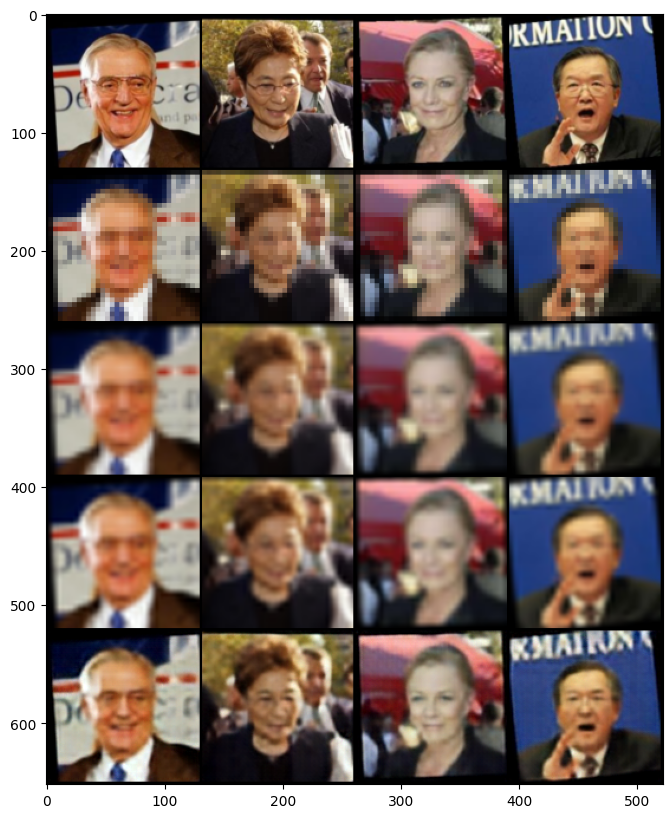

In [33]:
image = Image.open('./Upscaled_Images.png')

plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.show()

- 1번 행: Ground Truth 영상(128x128)
- 2번 행: Nearest Upsampling 영상(32x32 -> 128x128)
- 3번 행: Bilinear Upsampling 영상(32x32 -> 128x128)
- 4번 행: Bicubic Upsampling 영상(32x32 -> 128x128)
- 5번 행: CNN Upsampling 영상(32x32 -> 128x128)

- 128x128 영상을 32x32로 Resize(Scale Down)하고, 이를 다시 128x128로 Up-Sampling 하게 되면 영상의 해상도가 저하됨을 확인할 수 있음
- 실험한 여러 Up-Sampling 방법 중에서 CNN울 통한 Up-Sampling 영상이 원본 영상에 가장 가깝게 복원되었음을 확인할 수 있음 